In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder

In [3]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
!wget https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/refs/heads/master/data.csv

--2025-03-05 17:17:26--  https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/refs/heads/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>] 122.27K  --.-KB/s    in 0.02s   

2025-03-05 17:17:26 (7.75 MB/s) - ‘data.csv.1’ saved [125204/125204]



In [10]:
!head data.csv

"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",
842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130,1203,0.10

# Load & Explore Data

In [11]:
#load data on dataframe

df = pd.read_csv('./data.csv')

In [12]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
#count of rows and columns
df.shape

(569, 33)

In [14]:
#count number of null(empty) values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [15]:
# drop the column with null values
df.dropna(axis=1, inplace=True)

In [16]:
df.shape

(569, 32)

In [17]:
#get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# Label Encoding

In [19]:
#get datatypes of each column in our dataset
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [21]:
#encode the diagnosis values
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

In [22]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [24]:
#splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [25]:
#splitting datasets into training 75% and testing 25%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [26]:
#scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# print data
X_train

array([[-0.49519394, -0.13924197, -0.47146394, ..., -0.21165705,
         0.1572661 ,  0.19292201],
       [ 1.04322287, -2.08452985,  1.21664803, ...,  2.22915493,
         2.71375066,  1.90059542],
       [-0.17747742,  1.37060433, -0.18977467, ...,  0.04001911,
        -0.42748745, -0.54290033],
       ...,
       [ 1.62849013,  1.10555294,  1.69827192, ...,  1.14054385,
         0.60831568,  0.58394659],
       [ 1.65357301,  1.13158478,  2.06252528, ...,  2.01173056,
         4.0652885 ,  0.85314988],
       [-0.19698633, -1.14265081, -0.2136535 , ...,  0.19489675,
         0.09766312, -0.61795094]])

In [31]:
import numpy as np

In [38]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Build a Logistic Regression Model

In [39]:
#build a logisitic regression classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [40]:
#make use of trained model to make predictions on test data
predictions = clf.predict(X_test)

# Performance Evaluation

[[94  1]
 [ 2 46]]


<Axes: >

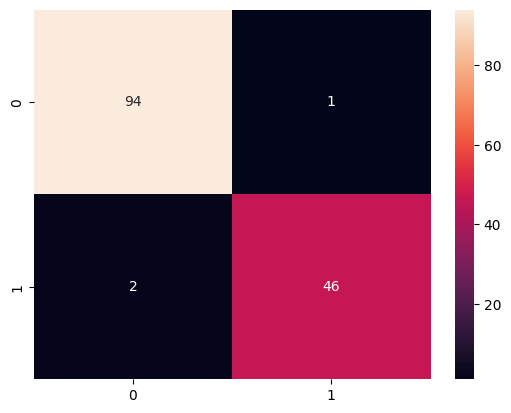

In [45]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm, annot=True)

In [47]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9790209790209791


In [48]:
print(y_test)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1]


In [49]:
print(predictions)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1]
